In [1]:
!pip install geopandas

In [2]:
!pip install folium

In [3]:
!pip install haversine

In [4]:
from shapely.geometry import Point, Polygon, LineString

In [5]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from haversine import haversine

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
Bike_Station=pd.read_csv('/content/drive/My Drive/compas/SBJ_2007_001/02.자전거스테이션.csv')
space_plan=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/10.도시계획(공간시설).geojson')
culphy_plan=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/11.도시계획(공공문화제육시설).geojson')
traffic_plan=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/12.도시계획(교통시설).geojson')
wetland_cons=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/13.용도지역지구(습지보호지역).geojson')
build_road=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/15.도로명주소_건물.geojson')
road_road=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/16.도로명주소_도로.geojson')
build_dist=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/17.일반건물 분포도(100M X 100M).geojson')
fes_space=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/18.행사장_공간정보.csv')
subway_station=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/19.전철역_공간정보.csv')
bus_station=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/20.고양시 버스정류소.csv')
parking_info=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/22.주차장정보.csv')
theat_muse=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/26.고양시 공연장 박물관 정보.csv')
physi_curr=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/27.고양시 체육시설 현황 정보.csv')
duk_godo=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/30.고양시_덕양구_고도.geojson')
ilsansu_godo=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/32.고양시_일산서구_고도.geojson')
ilsando_godo=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/31.고양시_일산동구_고도.geojson')
goyang_road=gpd.read_file('/content/drive/My Drive/compas/SBJ_2007_001/33.고양시_인도.geojson')

In [7]:
Bike_Station

,Station_ID,STATION_NAME,거치대 수량,위도,경도
0,101,어울림마을 701동 앞,20,37.654775,126.834584
1,103,대림e-편한세상106동,20,37.660442,126.840377
2,104,탄현마을8단지,25,37.698523,126.766042
3,105,KT 덕양지사 앞,20,37.655244,126.839261
4,106,원당역 앞 공영주차장,30,37.653410,126.842530
...,...,...,...,...,...
159,350,★하이파크5단지 502동앞 버스정류장,20,37.697867,126.753089
160,351,◆일산에듀포레 푸르지오,40,37.702259,126.767231
161,352,◆꿈에그린203동앞,40,37.666425,126.749244
162,353,◆꿈에그린106동앞,40,37.666720,126.750784


In [8]:
center = (37.647972, 126.835398)
zoom = 15
m = folium.Map(location = center, 
               zoom_start = zoom,
               tiles = 'http://api.vworld.kr/req/wmts/1.0.0/FEDE7284-9E9D-3624-BCA7-DDB9767882ED/Base/{z}/{y}/{x}.png',
               attr = '고양시'
              )
for index, row in Bike_Station.iterrows():
    folium.Marker([row['위도'], row['경도']]).add_to(m)    
    folium.Circle([row['위도'], row['경도']],
                  radius = 300, color = 'red' ).add_to(m)
m

#Multipolygon

In [9]:
import math

In [10]:
def geo_dis(Bike_Station, target):
  lscp=[]
  target_nm=target.columns.tolist()[[(t.find('NAME')>=0) | (t.lower().find('dgm_nm')>=0) | 
                                     (t.lower().find('bdtyp_cd')>=0) | (t.lower().find('mnum')>=0) for t in target.columns.tolist()].index(True)]
  for sta, lat, long in zip(Bike_Station['Station_ID'],Bike_Station['위도'],Bike_Station['경도']):
    for nm, geometry in zip(target[target_nm],target['geometry']):
      h=[]
      x = (lat, long)
      points = [point for polygon in geometry for point in polygon.exterior.coords[:]]
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
      if min(h)<=500:
        lscp.append([sta,nm,min(h)])
  return lscp

In [11]:
space_plan

,MNUM,ALIAS,REMARK,geometry
0,39400004128020200102UQT3300001000,None,None,"MULTIPOLYGON (((126.79244 37.67061, 126.79245 ..."
1,39400004128020200102UQT3300002000,None,None,"MULTIPOLYGON (((126.79125 37.66747, 126.79126 ..."
2,39400004128020200102UQT2100001000,None,None,"MULTIPOLYGON (((126.79216 37.67002, 126.79221 ..."
3,39400004128020200102UQT3100001000,None,None,"MULTIPOLYGON (((126.79275 37.66799, 126.79301 ..."
4,39400004128020200102UQT3100002000,None,None,"MULTIPOLYGON (((126.79139 37.66740, 126.79154 ..."
...,...,...,...,...
1089,16130004128020130925UQT3200087000,None,None,"MULTIPOLYGON (((126.87392 37.64883, 126.87388 ..."
1090,16130004128020150203UQT2200005000,None,None,"MULTIPOLYGON (((126.88345 37.66780, 126.88346 ..."
1091,16130004128020150203UQT2200003000,None,None,"MULTIPOLYGON (((126.88881 37.64833, 126.88854 ..."
1092,16130004128020150203UQT2200002000,None,None,"MULTIPOLYGON (((126.88267 37.64497, 126.88218 ..."


In [12]:
culphy_plan

,DGM_NM,DGM_AR,DGM_LT,geometry
0,기타 사회복지시설,2627,211,"MULTIPOLYGON (((126.86736 37.62940, 126.86761 ..."
1,초등학교,13070,461,"MULTIPOLYGON (((126.90542 37.71515, 126.90619 ..."
2,기타 사회복지시설,560,95,"MULTIPOLYGON (((126.78826 37.67892, 126.78836 ..."
3,초등학교,12000,444,"MULTIPOLYGON (((126.81611 37.68054, 126.81659 ..."
4,유치원,3000,219,"MULTIPOLYGON (((126.81012 37.68488, 126.81062 ..."
...,...,...,...,...
403,초등학교,6313,361,"MULTIPOLYGON (((126.78123 37.68526, 126.78126 ..."
404,골프장,295598,3041,"MULTIPOLYGON (((126.85537 37.63687, 126.85545 ..."
405,기타 사회복지시설,1063,137,"MULTIPOLYGON (((126.82721 37.70204, 126.82740 ..."
406,기타 사회복지시설,935,150,"MULTIPOLYGON (((126.90365 37.70301, 126.90365 ..."


In [13]:
traffic_plan

,DGM_NM,DGM_AR,DGM_LT,geometry
0,노외주차장,1930,269,"MULTIPOLYGON (((126.89527 37.70315, 126.89514 ..."
1,노외주차장,1006,130,"MULTIPOLYGON (((126.79379 37.65890, 126.79391 ..."
2,노외주차장,1111,134,"MULTIPOLYGON (((126.91072 37.71903, 126.91076 ..."
3,노외주차장,631,104,"MULTIPOLYGON (((126.89455 37.62056, 126.89480 ..."
4,노외주차장,987,132,"MULTIPOLYGON (((126.87241 37.59324, 126.87251 ..."
...,...,...,...,...
318,노외주차장,2057,188,"MULTIPOLYGON (((126.80513 37.62288, 126.80527 ..."
319,노외주차장,420,93,"MULTIPOLYGON (((126.85073 37.64267, 126.85075 ..."
320,노외주차장,982,150,"MULTIPOLYGON (((126.86762 37.61254, 126.86787 ..."
321,노외주차장,621,106,"MULTIPOLYGON (((126.81503 37.60231, 126.81503 ..."


In [14]:
build_road

,BDTYP_CD,BULD_NM,BULD_NM_DC,EMD_CD,GRO_FLO_CO,SIG_CD,UND_FLO_CO,geometry
0,01003,None,None,105,4,41281,0,"MULTIPOLYGON (((126.87256 37.62531, 126.87259 ..."
1,02003,헤리티지,3단지,113,4,41285,1,"MULTIPOLYGON (((126.77481 37.70779, 126.77485 ..."
2,02003,헤리티지,2단지,113,4,41285,1,"MULTIPOLYGON (((126.77510 37.70767, 126.77515 ..."
3,03999,None,None,111,3,41281,0,"MULTIPOLYGON (((126.89398 37.65698, 126.89411 ..."
4,03005,None,None,103,5,41281,0,"MULTIPOLYGON (((126.89124 37.66385, 126.89140 ..."
...,...,...,...,...,...,...,...,...
79997,03012,None,None,132,1,41281,0,"MULTIPOLYGON (((126.88868 37.59669, 126.88878 ..."
79998,21999,None,None,132,1,41281,0,"MULTIPOLYGON (((126.88879 37.59669, 126.88889 ..."
79999,03001,None,None,115,1,41281,0,"MULTIPOLYGON (((126.90831 37.69544, 126.90847 ..."
80000,01003,None,None,132,4,41281,0,"MULTIPOLYGON (((126.89266 37.60498, 126.89280 ..."


In [15]:
build_road['BDTYP_CD'].unique()

array(['01003', '02003', '03999', '03005', '01001', '13100', '16006',
       '03001', '17007', '16010', '04001', '03104', '14999', '04005',
       '04010', '04004', '14001', '04999', '19003', '04006', '02002',
       '01002', '04402', '04403', '08102', '17999', '10202', '17101',
       '17203', '03020', '19007', '04299', '08201', '16001', '06999',
       '03021', '04199', '05107', '08003', '08101', '15001', '06203',
       '08300', '02001', '04499', '17299', '05999', '07107', '16002',
       '03199', '04102', '03007', '03002', '18003', '05101', '05199',
       '19005', '08999', '15005', '01004', '04002', '18002', '16005',
       '90001', '05599', '06301', '03012', '08203', '04018', '04007',
       '09999', '02007', '11102', '17204', '08004', '04014', '11201',
       '05499', '08005', '15002', '04201', '07999', '09004', '17004',
       '17005', '08800', '04012', '03107', '02004', '02006', '02005',
       '03015', '04401', '10102', '03008', '08400', '10299', '16009',
       '10204', '169

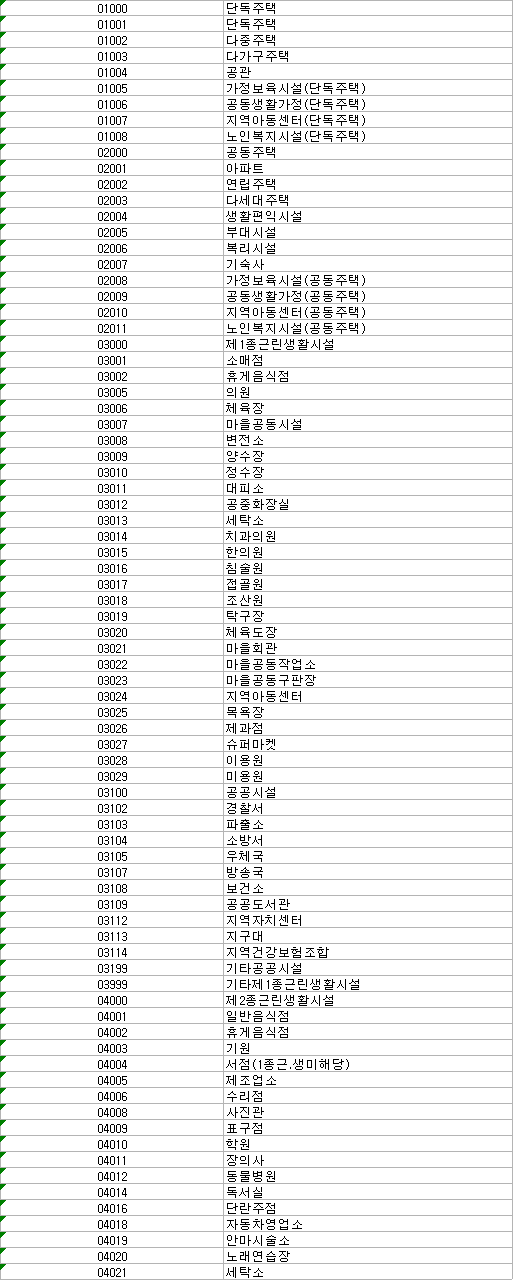

In [16]:
build_dist

,gid,val,geometry
0,다사268650,NaN,"MULTIPOLYGON (((126.66985 37.68162, 126.66984 ..."
1,다사268651,NaN,"MULTIPOLYGON (((126.66984 37.68252, 126.66983 ..."
2,다사268652,NaN,"MULTIPOLYGON (((126.66983 37.68342, 126.66982 ..."
3,다사268653,NaN,"MULTIPOLYGON (((126.66982 37.68432, 126.66981 ..."
4,다사268654,NaN,"MULTIPOLYGON (((126.66981 37.68522, 126.66980 ..."
...,...,...,...
27345,다사553641,NaN,"MULTIPOLYGON (((126.99310 37.67534, 126.99310 ..."
27346,다사553642,NaN,"MULTIPOLYGON (((126.99310 37.67624, 126.99309 ..."
27347,다사553643,NaN,"MULTIPOLYGON (((126.99309 37.67714, 126.99308 ..."
27348,다사553644,NaN,"MULTIPOLYGON (((126.99308 37.67804, 126.99308 ..."


In [17]:
geo_dis(Bike_Station,culphy_plan)

[[101, '기타 공공청사시설', 47.04951626961415],
 [101, '기타 공공청사시설', 234.126851730346],
 [101, '초등학교', 213.6640149179491],
 [101, '기타 공공청사시설', 447.60131782447127],
 [101, '기타 사회복지시설', 234.126851730346],
 [101, '기타 사회복지시설', 94.29993576335086],
 [101, '기타 사회복지시설', 358.256331289381],
 [103, '고등학교', 221.5545936081516],
 [103, '중학교', 362.489796836051],
 [103, '기타 공공청사시설', 451.4975323611296],
 [103, '초등학교', 384.27062565169234],
 [103, '초등학교', 404.32326535733284],
 [104, '특수학교', 451.30526079861147],
 [104, '초등학교', 189.41292431435792],
 [104, '기타 사회복지시설', 492.72177622225286],
 [104, '중학교', 307.86641854786006],
 [104, '초등학교', 119.78720215907305],
 [104, '중학교', 362.7127686918448],
 [104, '초등학교', 359.792165632781],
 [104, '고등학교', 250.8597181493347],
 [104, '기타 사회복지시설', 434.2354341069012],
 [104, '기타 사회복지시설', 482.77589723728545],
 [104, '청사(국가)', 289.47272129964944],
 [104, '기타 공공청사시설', 492.72177622225286],
 [104, '기타 사회복지시설', 494.7611630469015],
 [105, '기타 공공청사시설', 458.45447003655306],
 [105, '기타 공공청사시설',

In [18]:
geo_dis(Bike_Station,traffic_plan)

[[101, '일반철도', 238.30944931855743],
 [101, '노외주차장', 378.9229428640642],
 [101, '노외주차장', 372.24810331606744],
 [101, '노외주차장', 191.46736113819202],
 [103, '일반철도', 314.3122009527669],
 [103, '일반철도', 197.58155841494354],
 [104, '일반철도', 416.10829641262177],
 [105, '공영차고지', 478.0432823597679],
 [105, '도시철도', 385.75565086629734],
 [105, '노외주차장', 208.1671506061258],
 [105, '노외주차장', 174.29116665198106],
 [106, '공영차고지', 141.83419468530084],
 [106, '도시철도', 34.94084306097616],
 [106, '노외주차장', 353.7666426723699],
 [106, '노외주차장', 346.21884584812295],
 [106, '노외주차장', 325.80174505544164],
 [106, '노외주차장', 308.90222838669035],
 [111, '기타 주차장시설', 337.5101375695716],
 [112, '기타 주차장시설', 459.78383698956554],
 [112, '노외주차장', 499.384539063459],
 [113, '노외주차장', 413.0576694867511],
 [113, '노외주차장', 353.7538159670087],
 [113, '노외주차장', 157.5905060750515],
 [113, '도시철도', 361.43060677605365],
 [113, '노외주차장', 128.75023459675774],
 [113, '노외주차장', 329.23046924976364],
 [113, '여객자동차터미널', 391.04912724898867],
 [114, '노외주

In [19]:
bike_culphy=pd.DataFrame(geo_dis(Bike_Station,culphy_plan),columns=['Bike_Station','Culphy_NM','Harv_dis'])
bike_traffic=pd.DataFrame(geo_dis(Bike_Station,traffic_plan),columns=['Bike_Station','Traffic_NM','Harv_dis'])

In [20]:
bike_culphy

,Bike_Station,Culphy_NM,Harv_dis
0,101,기타 공공청사시설,47.049516
1,101,기타 공공청사시설,234.126852
2,101,초등학교,213.664015
3,101,기타 공공청사시설,447.601318
4,101,기타 사회복지시설,234.126852
...,...,...,...
1093,992,초등학교,413.024741
1094,992,기타 도서관시설,247.900944
1095,992,기타 공공청사시설,55.451436
1096,992,기타 공공청사시설,45.820533


In [21]:
bike_traffic

,Bike_Station,Traffic_NM,Harv_dis
0,101,일반철도,238.309449
1,101,노외주차장,378.922943
2,101,노외주차장,372.248103
3,101,노외주차장,191.467361
4,103,일반철도,314.312201
...,...,...,...
602,992,노외주차장,300.026796
603,992,도시철도,316.690735
604,992,노외주차장,241.235672
605,992,노외주차장,400.485866


In [22]:
lscp_base=pd.DataFrame(np.array(Bike_Station['Station_ID']),columns=['Bike_Station'])
bike_hosu=pd.DataFrame(geo_dis(Bike_Station,space_plan.iloc[[14,166],:]),columns=['Bike_Station','MNUS','Harv_dis'])
bike_hosu['Hosu_yes']=1
bike_hosu=lscp_base.merge(bike_hosu[['Bike_Station','Hosu_yes']],on='Bike_Station',how='outer').fillna(0).drop_duplicates().reset_index(drop=True)
bike_hosu['Hosu_yes']=bike_hosu['Hosu_yes'].astype(int)

In [23]:
bike_hosu[bike_hosu['Hosu_yes']==1]

,Bike_Station,Hosu_yes
62,207,1
63,210,1
103,252,1
104,253,1
105,254,1
110,259,1
111,260,1
118,302,1
154,345,1


In [24]:
bike_hosu

,Bike_Station,Hosu_yes
0,101,0
1,103,0
2,104,0
3,105,0
4,106,0
...,...,...
159,350,0
160,351,0
161,352,0
162,353,0


In [25]:
bike_park=pd.DataFrame(geo_dis(Bike_Station,space_plan.iloc[[27, 28, 45, 53, 54, 55, 56, 57, 58, 59, 60, 61, 
                                                             63, 101, 160, 161, 162, 164, 165, 211, 212, 213, 
                                                             214, 215, 216, 219, 220, 222, 223, 228, 229, 232, 
                                                             233, 234, 236, 241, 247, 293, 297, 403,562, 581, 659, 730, 1091,1092,1093],:]),columns=['Bike_Station','MNUS','Harv_dis'])
bike_park['Park_count']=1
# 아래는 유무만 판별하는 코드
# bike_park=bike_park[['Bike_Station','Park_yes']].drop_duplicates()
# 아래는 개수 더하는 코드
bike_park=bike_park[['Bike_Station','Park_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_park.columns=['Bike_Station','Park_count']
bike_park=lscp_base.merge(bike_park[['Bike_Station','Park_count']],on='Bike_Station',how='outer').fillna(0)
bike_park['Park_count']=bike_park['Park_count'].astype(int)

In [26]:
bike_park

,Bike_Station,Park_count
0,101,0
1,103,2
2,104,0
3,105,0
4,106,0
...,...,...
159,350,1
160,351,0
161,352,1
162,353,1


In [27]:
# bike_culphy.to_csv('/content/drive/My Drive/compas/염씨 자료/culphy_plan_350.csv')
# bike_traffic.to_csv('/content/drive/My Drive/compas/염씨 자료/traffic_plan_350.csv')

In [28]:
# bike_hosu.to_csv('/content/drive/My Drive/compas/염씨 자료/hosu_350.csv')

In [29]:
# bike_park.to_csv('/content/drive/My Drive/compas/염씨 자료/park_350.csv')

# X,Y

In [30]:
fes_space[fes_space['명칭']=='KINTEX']

,명칭,위도,경도,geometry
0,KINTEX,37.669028,126.746184,None


In [31]:
fes_space['위도']=fes_space['위도'].astype('float64')
fes_space['경도']=fes_space['경도'].astype('float64')

In [32]:
Bike_Station

,Station_ID,STATION_NAME,거치대 수량,위도,경도
0,101,어울림마을 701동 앞,20,37.654775,126.834584
1,103,대림e-편한세상106동,20,37.660442,126.840377
2,104,탄현마을8단지,25,37.698523,126.766042
3,105,KT 덕양지사 앞,20,37.655244,126.839261
4,106,원당역 앞 공영주차장,30,37.653410,126.842530
...,...,...,...,...,...
159,350,★하이파크5단지 502동앞 버스정류장,20,37.697867,126.753089
160,351,◆일산에듀포레 푸르지오,40,37.702259,126.767231
161,352,◆꿈에그린203동앞,40,37.666425,126.749244
162,353,◆꿈에그린106동앞,40,37.666720,126.750784


In [33]:
Bike_Station.iloc[:,[(b.find('NAME')>0) | (b.lower().find('NM')>0) for b in Bike_Station.columns.tolist()]]

,STATION_NAME
0,어울림마을 701동 앞
1,대림e-편한세상106동
2,탄현마을8단지
3,KT 덕양지사 앞
4,원당역 앞 공영주차장
...,...
159,★하이파크5단지 502동앞 버스정류장
160,◆일산에듀포레 푸르지오
161,◆꿈에그린203동앞
162,◆꿈에그린106동앞


In [34]:
def harv_dis(Bike_Station, target):
  lscp=[]
  target_nm=target.columns.tolist()[[(t.find('NAME')>=0) | (t.lower().find('station_nm')>=0) | 
                                     (t.lower().find('parking_nm')>=0) | (t.lower().find('place_nm')>=0)|
                                     (t.find('명칭')>=0) for t in target.columns.tolist()].index(True)]
  for sta, lat, long in zip(Bike_Station['Station_ID'],Bike_Station['위도'],Bike_Station['경도']):
    try:
      for nm, t_lat, t_long in zip(target[target_nm],target['위도'],target['경도']):
        t_lat=float(t_lat)
        t_long=float(t_long)
        x = (lat, long)
        y = (t_lat, t_long) 
        h = haversine(x, y, unit='m')
        if h <=500:
          lscp.append([sta,nm,h])
    except:
      try:
        for nm, t_lat, t_long, t_count in zip(target[target_nm],target['Y'],target['X'],target['count']):
          t_lat=float(t_lat)
          t_long=float(t_long)
          x = (lat, long)
          y = (t_lat, t_long) 
          h = haversine(x, y, unit='m')
          if h <=500:
            lscp.append([sta,nm,t_lat,t_long,t_count,h])
      except:
        for nm, t_lat, t_long in zip(target[target_nm],target['Y'],target['X']):
          t_lat=float(t_lat)
          t_long=float(t_long)
          x = (lat, long)
          y = (t_lat, t_long) 
          h = haversine(x, y, unit='m')
          if h <=500:
            lscp.append([sta,nm,t_lat,t_long,h])
  return lscp

In [35]:
center = (37.647972, 126.835398)
zoom = 15
f = folium.Map(location = center, 
               zoom_start = zoom,
               tiles = 'http://api.vworld.kr/req/wmts/1.0.0/FEDE7284-9E9D-3624-BCA7-DDB9767882ED/Base/{z}/{y}/{x}.png',
               attr = '고양시'
              )
for index, frow in fes_space.iterrows():
    folium.Marker([frow['위도'], frow['경도']]).add_to(f)
    folium.Circle([frow['위도'], frow['경도']],
                  radius = 250, color = 'red' ).add_to(f)
f

KINTEX는 250m를 추가한 거리로, 호수공원은 도시계획 데이터를 활용하는 쪽으로 (166, 14)  
기타 공원 (27, 28, 45, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 101, 160,161,162, 164, 165, 211, 212, 213, 214, 215, 216, 219, 220, 222, 223, 228, 229, 232, 233, 234, 236, 241, 247, 293, 297, 403,562, 581, 659, 730, 1091,1092,1093,1094)

In [36]:
subway_station

,rail_nm,station_nm,lot_num_addr,road_nm_addr,X,Y,geometry
0,3호선,대곡,경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로107번길 71-81,126.80961400,37.63230600,None
1,3호선,대화,경기도 고양시 일산서구 대화동 2221,경기도 고양시 일산서구 중앙로 지하 1569,126.74720600,37.67584600,None
2,경의중앙,일산,경기도 고양시 일산서구 일산동 655-691,경기도 고양시 일산서구 경의로 672,126.77006749,37.68200683,None
3,3호선,백석,경기도 고양시 일산동구 백석동 1538,경기도 고양시 일산동구 중앙로 지하 1042,126.78814830,37.64295283,None
4,경의중앙,대곡,경기도 고양시 덕양구 대장동 420-1,경기도 고양시 덕양구 대주로 107번길 71-81,126.81104692,37.63161489,None
5,경의중앙,강매,경기도 고양시 덕양구 행신동 1115-1,경기도 고양시 덕양구 소원로 202,126.84443637,37.61228963,None
6,경의중앙,백마,경기도 고양시 일산동구 백석동 92,경기도 고양시 일산동구 경의로 318,126.79406700,37.65843100,None
7,경의중앙,능곡,경기도 고양시 덕양구 토당동 454-3,경기도 고양시 덕양구 토당로 35,126.82083836,37.61876543,None
8,경의중앙,풍산,경기도 고양시 일산동구 풍동 1042,경기도 고양시 일산동구 경의로 486,126.78652800,37.67181500,None
9,경의중앙,행신,경기도 고양시 덕양구 행신동 812,경기도 고양시 덕양구 소원로 114,126.83411700,37.61217000,None


In [37]:
bus_station

,STATION_NM,STATION_ID,X,Y,geometry
0,신일비즈니스고등학교,219000619,126.76059160,37.68329610,None
1,중앙공원삼거리,219000587,126.77698920,37.68893365,None
2,문촌마을14.19단지,219000624,126.75245060,37.67101090,None
3,문촌마을14.19단지,219000623,126.75245220,37.67144817,None
4,중앙공원삼거리,219000586,126.77741200,37.68877103,None
...,...,...,...,...,...
2227,고양시청후문,218000940,126.83267640,37.65909039,None
2228,사리현동문아파트,219000927,126.84534680,37.69938184,None
2229,서울시립고양병원입구,218000530,126.85200480,37.71223607,None
2230,옥빛마을14.15단지,218001000,126.83332490,37.62869880,None


In [38]:
parking_info

,parking_nm,road_nm_addr,lot_num_addr,space,X,Y,geometry
0,고양시청 부설주차장,경기도 고양시 덕양구 고양시청로10,경기도 고양시 덕양구 주교동 600,140,126.83207210,37.65804217,None
1,고양제1,경기도 고양시 덕양구 벽제관로 8,경기도 고양시 덕양구 고양동 195-2,94,126.90386130,37.70378261,None
2,고양제2,경기도 고양시 덕양구 혜음로 103,경기도 고양시 덕양구 고양동 444-1,31,126.90534690,37.71021294,None
3,노상 1권역,경기도 고양시 덕양구 고양시청로 10,경기도 고양시 덕양구 주교동 600,97,126.83195970,37.65841450,None
4,노상 3권역,경기도 고양시 덕양구 은빛로 39,경기도 고양시 덕양구 화정동 909,123,126.83217320,37.63809581,None
...,...,...,...,...,...,...,...
65,호수공원 부설주차장 2,경기도 고양시 일산동구 호수로 595,경기도 고양시 일산동구 장항동 906,512,126.76319260,37.66192311,None
66,호수공원 부설주차장 3,경기도 고양시 일산동구 호수로 595,경기도 고양시 일산동구 장항동 906,54,126.76906910,37.65490077,None
67,호수공원 부설주차장 4,경기도 고양시 일산동구 호수로 595,경기도 고양시 일산동구 장항동 906,125,126.77094230,37.65166944,None
68,화정환승,경기도 고양시 덕양구 화정로 지하 63,경기도 고양시 덕양구 화정동 963,253,126.83304570,37.63495085,None


In [39]:
theat_muse

,servicetype,place_nm,X,Y,geometry
0,공연장,활주로7080 공연장,126.76748660,37.66350213,None
1,공연장,행주아트홀,126.82288460,37.60256329,None
2,공연장,올리브,126.76787950,37.66310189,None
3,공연장,3 NEW THEATRE,126.72524780,37.69086437,None
4,공연장,터 시어터,126.78217290,37.65943261,None
5,공연장,벧엘뮤직홀,126.77239340,37.65800941,None
6,공연장,우경아트홀(k뮤직아카데미),126.83104780,37.63142043,None
7,공연장,레미어린이극장,126.75379020,37.66719469,None
8,공연장,나가수공연장,126.76666710,37.66352438,None
9,공연장,노루목야외극장,126.77464700,37.66152217,None


In [40]:
physi_curr

,NO,GBN,FAC_NAME,OPER_NAME,X,Y,geometry
0,1,육상,"고양종합운동장(주,보조)",고양도시관리공사,126.742594,37.675787,None
1,2,육상,어울림 별무리 운동장,고양도시관리공사,126.834639,37.649847,None
2,3,축구장,"고양종합운동장 축구장(주,보조)",고양도시관리공사,126.742594,37.675787,None
3,4,축구장,백석공원 축구장,고양도시관리공사,126.794876,37.645546,None
4,5,축구장,중산중앙 근린공원축구장,고양도시관리공사,126.778620,37.691654,None
...,...,...,...,...,...,...,...
172,173,다목적시설,고양백석체육센터 GX장,고양도시관리공사,126.796418,37.641976,None
173,174,축구장,원능하수처리장축구장,원능스질복원센터,126.794780,37.624858,None
174,175,축구장,창릉동운동장,덕양구 산업위생과,126.893888,37.641831,None
175,176,게이트볼장,일산3동 게이트볼장,일산서구 산업위생과,126.763313,37.680025,None


In [41]:
physi_curr['GBN'].unique()

array(['육상', '축구장', '수영장', '빙상장', '풋살구장', '배드민턴장', '테니스장', '게이트볼장',
       '파크골프장', '족구장', '인라인하키', '인라인스케이트장', '야구장', '인공암벽장', '농구장', '궁도장',
       '탁구장', '스쿼시', '골프연습장', '헬스장', '클라이밍', '다목적운동장', '야외배드민턴장', '국궁장',
       '실내배드민턴장', 'X게임장', '골프', '다목적시설'], dtype=object)

In [42]:
harv_dis(Bike_Station,subway_station)

[[105, '원당', 37.65331645, 126.84303034, 395.03736404268994],
 [106, '원당', 37.65331645, 126.84303034, 45.20881228724237],
 [113, '화정', 37.63459661, 126.83266635, 418.4009341461138],
 [114, '화정', 37.63459661, 126.83266635, 253.2638469715485],
 [115, '화정', 37.63459661, 126.83266635, 338.1530528858322],
 [116, '화정', 37.63459661, 126.83266635, 119.5320461902937],
 [118, '화정', 37.63459661, 126.83266635, 41.57945903053564],
 [119, '화정', 37.63459661, 126.83266635, 32.59824118094351],
 [121, '화정', 37.63459661, 126.83266635, 431.7017233396446],
 [133, '능곡', 37.61876543, 126.82083836, 84.0102502571594],
 [143, '행신', 37.61217, 126.834117, 384.14267800627925],
 [144, '행신', 37.61217, 126.834117, 41.1889468787644],
 [161, '원흥', 37.65074577, 126.87260033, 418.30776659566095],
 [162, '원흥', 37.65074577, 126.87260033, 31.98285903976335],
 [163, '원흥', 37.65074577, 126.87260033, 167.42110147932368],
 [164, '원흥', 37.65074577, 126.87260033, 476.60970415536985],
 [169, '삼송', 37.65310988, 126.89558955, 90.8939

In [43]:
harv_dis(Bike_Station,bus_station)

[[101, '원당약국.원당시장정문', 37.65643774, 126.8362366, 235.26809262790917],
 [101, '주교동.원릉방앗간', 37.65833074, 126.8346249, 395.43681828532254],
 [101, '명승세도나빌딩', 37.6561427, 126.8355591, 174.64845242236865],
 [101, '세창짜임아파트', 37.65794241, 126.8375441, 438.1256187439987],
 [101, '고양시청', 37.6559993, 126.8310977, 335.8043455059235],
 [101, '고양시청.덕양구보건소', 37.65695814, 126.8312167, 383.2063573974159],
 [101, '리스쇼핑.원당시장', 37.6558782, 126.8368911, 237.25537076006282],
 [101, '고양시청.주교동.덕양구보건소치매안심센터', 37.65741077, 126.8339357, 298.63730859502834],
 [101, '고양시청.덕양구보건소', 37.65692789, 126.831462, 364.5366896452948],
 [101, '고양시청.덕양구보건소치매안심센터', 37.6570043, 126.8332113, 275.828541477923],
 [101, '성사2동행정복지센터', 37.65251606, 126.8322356, 325.3200731022803],
 [101, '신원당마을입구', 37.65446952, 126.837444, 254.009254805023],
 [101, '신원당마을7단지', 37.65375388, 126.8333509, 157.08863881006113],
 [101, '고양시청', 37.65613725, 126.8318963, 280.99880458550064],
 [101, '신원당마을7단지', 37.65426973, 126.8334518, 114.43522719037841],
 

In [44]:
harv_dis(Bike_Station,parking_info)

[[101, '고양시청 부설주차장', 37.65804217, 126.8320721, 425.35607752399454],
 [101, '노상 1권역', 37.6584145, 126.8319597, 466.04859446401804],
 [101, '성사제1', 37.65355843, 126.8385705, 376.06342422588807],
 [101, '성사제2', 37.65324409, 126.8386255, 394.3619644278487],
 [101, '주교제1', 37.65559958, 126.8317801, 263.3710547566957],
 [101, '주교제2', 37.65652511, 126.8331366, 232.6647348829875],
 [105, '성사제1', 37.65355843, 126.8385705, 196.99832385588934],
 [105, '성사제2', 37.65324409, 126.8386255, 229.27076738267462],
 [105, '원당환승', 37.65408443, 126.8410987, 206.8763790026047],
 [106, '성사제1', 37.65355843, 126.8385705, 349.01199870081166],
 [106, '성사제2', 37.65324409, 126.8386255, 344.2715927184309],
 [106, '원당환승', 37.65408443, 126.8410987, 146.687549446479],
 [112, '노상 3권역', 37.63809581, 126.8321732, 333.331912743013],
 [112, '덕양구청 부설주차장', 37.63696494, 126.8319329, 459.9173167794148],
 [113, '노상 3권역', 37.63809581, 126.8321732, 287.8267768061386],
 [113, '덕양구청 부설주차장', 37.63696494, 126.8319329, 315.2136992552693

In [45]:
harv_dis(Bike_Station,theat_muse)

[[101, '별모래극장', 37.65056635, 126.834803, 468.33634872382834],
 [101, '고양시문예회관', 37.6579427, 126.8328452, 384.1092602535558],
 [110, '별모래극장', 37.65056635, 126.834803, 289.9644602979397],
 [110, '어울림극장', 37.65023587, 126.8354291, 265.5291163439692],
 [110, '꽃메야외극장', 37.64961425, 126.8351707, 192.76232834231175],
 [115, '우경아트홀(k뮤직아카데미)', 37.63142043, 126.8310478, 183.16546374326785],
 [115, '고양어린이박물관', 37.62946039, 126.8306232, 366.2672216252651],
 [116, '우경아트홀(k뮤직아카데미)', 37.63142043, 126.8310478, 327.93584300934884],
 [118, '우경아트홀(k뮤직아카데미)', 37.63142043, 126.8310478, 394.887537426267],
 [119, '우경아트홀(k뮤직아카데미)', 37.63142043, 126.8310478, 411.19708869166374],
 [121, '우경아트홀(k뮤직아카데미)', 37.63142043, 126.8310478, 61.616336768007855],
 [121, '고양어린이박물관', 37.62946039, 126.8306232, 186.74942231593417],
 [125, '고양어린이박물관', 37.62946039, 126.8306232, 320.12642445268364],
 [125, '토당청소년수련관', 37.62580794, 126.8297873, 280.9837028997971],
 [126, '우경아트홀(k뮤직아카데미)', 37.63142043, 126.8310478, 416.5858401751483

In [46]:
harv_dis(Bike_Station,physi_curr)

[[101, '문예회관체육관', 37.658142, 126.832537, 415.5586960497558],
 [103, '성사다목적체육관', 37.662296, 126.843466, 341.2757819640242],
 [103, '성사시립테니스장', 37.661724, 126.844008, 350.01416332960105],
 [103, '성사다목적체육관(실내)', 37.662296, 126.843466, 341.2757819640242],
 [103, '성사체육공원족구장', 37.662296, 126.843466, 341.2757819640242],
 [103, '고양국민체육센터', 37.662296, 126.843466, 341.2757819640242],
 [103, '고양국민체육센터', 37.662296, 126.843466, 341.2757819640242],
 [103, '족구장', 37.662296, 126.843466, 341.2757819640242],
 [104, '탄현배드민턴장', 37.700421, 126.769948, 403.2986902123393],
 [104, '탄현공원', 37.700421, 126.769948, 403.2986902123393],
 [110, '어울림 별무리 운동장', 37.649847, 126.834639, 209.01875651459378],
 [110, '어울림(별무리)축구장', 37.649847, 126.834639, 209.01875651459378],
 [110, '어울림누리(꽃우물 수영장)', 37.649847, 126.834639, 209.01875651459378],
 [110, '어울림누리(얼음마루)', 37.649847, 126.834639, 209.01875651459378],
 [110, '어울림누리(몸과마음 닦음터)', 37.649847, 126.834639, 209.01875651459378],
 [110, '어울림누리', 37.649847, 126.834639, 209.01875

In [47]:
parking_info['count']=parking_info['space']

In [48]:
lscp_parking=pd.DataFrame(harv_dis(Bike_Station,parking_info),columns=['Bike_Station','Parking','lat','long','Space_count','Harv_dis'])
lscp_cult=pd.DataFrame(harv_dis(Bike_Station,theat_muse),columns=['Bike_Station','Culture','lat','long','Harv_dis'])
lscp_physi=pd.DataFrame(harv_dis(Bike_Station,physi_curr),columns=['Bike_Station','Physical','lat','long','Harv_dis'])

In [49]:
lscp_cult

,Bike_Station,Culture,lat,long,Harv_dis
0,101,별모래극장,37.650566,126.834803,468.336349
1,101,고양시문예회관,37.657943,126.832845,384.109260
2,110,별모래극장,37.650566,126.834803,289.964460
3,110,어울림극장,37.650236,126.835429,265.529116
4,110,꽃메야외극장,37.649614,126.835171,192.762328
...,...,...,...,...,...
64,302,레미어린이극장,37.667195,126.753790,284.117986
65,345,레미어린이극장,37.667195,126.753790,442.977296
66,345,(주)일산씨월드-한화 아쿠아플라넷 일산,37.663520,126.755455,398.463640
67,352,레미어린이극장,37.667195,126.753790,409.204702


In [50]:
lscp_cult['Culture_count']=1
bike_cult=lscp_cult[['Bike_Station','Culture_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_cult=lscp_base.merge(bike_cult,on='Bike_Station',how='outer').fillna(0)
bike_cult['Culture_count']=bike_cult['Culture_count'].astype(int)

In [51]:
lscp_physi['Sport_count']=1
bike_physi=lscp_physi[['Bike_Station','Sport_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_physi=lscp_base.merge(bike_physi,on='Bike_Station',how='outer').fillna(0)
bike_physi['Sport_count']=bike_physi['Sport_count'].astype(int)

In [52]:
lscp_cult

,Bike_Station,Culture,lat,long,Harv_dis,Culture_count
0,101,별모래극장,37.650566,126.834803,468.336349,1
1,101,고양시문예회관,37.657943,126.832845,384.109260,1
2,110,별모래극장,37.650566,126.834803,289.964460,1
3,110,어울림극장,37.650236,126.835429,265.529116,1
4,110,꽃메야외극장,37.649614,126.835171,192.762328,1
...,...,...,...,...,...,...
64,302,레미어린이극장,37.667195,126.753790,284.117986,1
65,345,레미어린이극장,37.667195,126.753790,442.977296,1
66,345,(주)일산씨월드-한화 아쿠아플라넷 일산,37.663520,126.755455,398.463640,1
67,352,레미어린이극장,37.667195,126.753790,409.204702,1


In [53]:
bike_physi

,Bike_Station,Sport_count
0,101,1
1,103,7
2,104,2
3,105,0
4,106,0
...,...,...
159,350,4
160,351,2
161,352,0
162,353,0


In [54]:
lscp_parking['Space_count']=lscp_parking['Space_count'].astype(int)
bike_parking=lscp_parking[['Bike_Station','Space_count']].groupby('Bike_Station').agg('sum').reset_index()
bike_parking=lscp_base.merge(bike_parking,on='Bike_Station',how='outer').fillna(0)
bike_parking['Space_count']=bike_parking['Space_count'].astype(int)

In [55]:
bike_parking

,Bike_Station,Space_count
0,101,711
1,103,0
2,104,0
3,105,349
4,106,349
...,...,...
159,350,0
160,351,0
161,352,282
162,353,282


In [56]:
lscp_fes=pd.DataFrame(harv_dis(Bike_Station,fes_space[fes_space['명칭']=='KINTEX']),columns=['Bike_Station','KINTEX','Harv_dis'])

In [57]:
lscp_fes

,Bike_Station,KINTEX,Harv_dis
0,304,KINTEX,153.202431
1,352,KINTEX,395.370844
2,353,KINTEX,479.368652


In [58]:
bus_pop = pd.read_csv('/content/drive/My Drive/compas/가공된 데이터/bus_merged.csv')
bus_pop.columns=['ID','Station_NM','district','Y','X','count']

In [59]:
bus_pop

,ID,Station_NM,district,Y,X,count
0,219000619,신일비즈니스고등학교,대화동,37.683296,126.760592,3496.0
1,219000587,중앙공원삼거리,일산동,37.688934,126.776989,2666.0
2,219000624,문촌마을14.19단지,주엽동,37.671011,126.752451,0.0
3,219000623,문촌마을14.19단지,대화동,37.671448,126.752452,298.0
4,219000586,중앙공원삼거리,중산동,37.688771,126.777412,25.0
...,...,...,...,...,...,...
2227,218000940,고양시청후문,주교동,37.659090,126.832676,788.0
2228,219000927,사리현동문아파트,사리현동,37.699382,126.845347,5868.0
2229,218000530,서울시립고양병원입구,내유동,37.712236,126.852005,5483.0
2230,218001000,옥빛마을14.15단지,화정동,37.628699,126.833325,5023.0


In [60]:
lscp_bus=pd.DataFrame(harv_dis(Bike_Station,bus_pop),columns=['Bike_Station','Bus_Station','lat','long','Bus_pop','Harv_dis'])
lscp_bus_pop=lscp_bus[['Bike_Station','Bus_pop']].groupby('Bike_Station').agg('sum').reset_index()
lscp_bus_pop=lscp_base.merge(lscp_bus_pop,on='Bike_Station',how='outer').fillna(0)
lscp_bus_pop['Bus_pop']=lscp_bus_pop['Bus_pop'].astype(int)

In [61]:
lscp_bus_pop

,Bike_Station,Bus_pop
0,101,228849
1,103,81961
2,104,78852
3,105,422520
4,106,308135
...,...,...
159,350,31836
160,351,63520
161,352,89081
162,353,91515


In [62]:
sub_pop=pd.read_csv('/content/drive/My Drive/compas/가공된 데이터/subway_merged.csv')
sub_pop=sub_pop[['역명','지하철_위도','지하철_경도','승하차_연간합계']]
sub_pop.columns=['Station_NM','Y','X','count']

In [63]:
sub_pop

,Station_NM,Y,X,count
0,대곡,37.632306,126.809614,1094752
1,대화,37.675846,126.747206,10008025
2,일산,37.682007,126.770067,6808074
3,백석,37.642953,126.788148,8533226
4,대곡,37.631615,126.811047,1094752
5,강매,37.612290,126.844436,1859720
6,백마,37.658431,126.794067,4733842
7,능곡,37.618765,126.820838,2637855
8,풍산,37.671815,126.786528,3577046
9,행신,37.612170,126.834117,5568132


In [64]:
lscp_sub=pd.DataFrame(harv_dis(Bike_Station,sub_pop),columns=['Bike_Station','Sub_Station','lat','long','Sub_pop','Harv_dis'])
lscp_sub_pop=lscp_sub[['Bike_Station','Sub_pop']].groupby('Bike_Station').agg('sum').reset_index()
lscp_sub_pop=lscp_base.merge(lscp_sub_pop,on='Bike_Station',how='outer').fillna(0)
lscp_sub_pop['Sub_pop']=lscp_sub_pop['Sub_pop'].astype(int)

In [65]:
lscp_sub_pop

,Bike_Station,Sub_pop
0,101,0
1,103,0
2,104,0
3,105,8607849
4,106,8607849
...,...,...
159,350,0
160,351,0
161,352,0
162,353,0


In [66]:
bike_fes=lscp_base.merge(lscp_fes.iloc[:,:-1],on='Bike_Station',how='outer').fillna(0)

In [67]:
bike_fes

,Bike_Station,KINTEX
0,101,0
1,103,0
2,104,0
3,105,0
4,106,0
...,...,...
159,350,0
160,351,0
161,352,KINTEX
162,353,KINTEX


In [68]:
bike_fes['KINTEX'][bike_fes['KINTEX']=='KINTEX']=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
bike_fes[bike_fes['KINTEX']==1]

,Bike_Station,KINTEX
120,304,1
161,352,1
162,353,1


In [70]:
# lscp_bus.to_csv('/content/drive/My Drive/compas/염씨 자료/bus_350.csv')
# lscp_sub.to_csv('/content/drive/My Drive/compas/염씨 자료/sub_350.csv')
# lscp_cult.to_csv('/content/drive/My Drive/compas/염씨 자료/culture_350.csv')
# lscp_physi.to_csv('/content/drive/My Drive/compas/염씨 자료/physical_350.csv')
# lscp_parking.to_csv('/content/drive/My Drive/compas/염씨 자료/parking_350.csv')

In [71]:
# bike_fes.to_csv('/content/drive/My Drive/compas/염씨 자료/KINTEX_600.csv')

# 고도 데이터


In [72]:
def geo_godo(Bike_Station, target):
  lscp=[]
  for sta, lat, long in zip(Bike_Station['Station_ID'],Bike_Station['위도'],Bike_Station['경도']):
    for dn, geometry in zip(target['DN'],target['geometry']):
      h=[]
      x = (lat, long)
      points = [point for point in geometry.exterior.coords[:]]
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
      if min(h)<=500:
        lscp.append([sta,dn,min(h)])
  return lscp

In [73]:
duk_godo

,fid,DN,geometry
0,1,347,"POLYGON ((126.92421 37.75297, 126.92421 37.752..."
1,2,361,"POLYGON ((126.92523 37.75297, 126.92523 37.752..."
2,3,374,"POLYGON ((126.92625 37.75297, 126.92625 37.751..."
3,4,425,"POLYGON ((126.92727 37.75297, 126.92727 37.752..."
4,5,484,"POLYGON ((126.92829 37.75297, 126.92829 37.752..."
...,...,...,...
19103,19104,12,"POLYGON ((126.85308 37.56883, 126.85308 37.568..."
19104,19105,11,"POLYGON ((126.85410 37.56883, 126.85410 37.567..."
19105,19106,5,"POLYGON ((126.85206 37.56802, 126.85207 37.567..."
19106,19107,9,"POLYGON ((126.85308 37.56802, 126.85308 37.567..."


In [74]:
ilsando_godo

,fid,DN,geometry
0,1,12,"POLYGON ((126.79284 37.73975, 126.79284 37.738..."
1,2,11,"POLYGON ((126.79488 37.73975, 126.79488 37.738..."
2,3,17,"POLYGON ((126.79080 37.73894, 126.79080 37.738..."
3,4,15,"POLYGON ((126.79182 37.73894, 126.79182 37.738..."
4,5,18,"POLYGON ((126.79284 37.73894, 126.79284 37.738..."
...,...,...,...
5693,5694,3,"POLYGON ((126.79316 37.62298, 126.79317 37.622..."
5694,5695,5,"POLYGON ((126.79418 37.62299, 126.79419 37.622..."
5695,5696,10,"POLYGON ((126.78909 37.62217, 126.78909 37.621..."
5696,5697,9,"POLYGON ((126.79011 37.62217, 126.79011 37.621..."


In [75]:
ilsansu_godo

,fid,DN,geometry
0,1,19,"POLYGON ((126.76181 37.71165, 126.76182 37.710..."
1,2,20,"POLYGON ((126.76283 37.71165, 126.76284 37.709..."
2,3,22,"POLYGON ((126.76385 37.71165, 126.76386 37.710..."
3,4,25,"POLYGON ((126.76487 37.71165, 126.76488 37.710..."
4,5,27,"POLYGON ((126.76589 37.71165, 126.76590 37.710..."
...,...,...,...
2462,2463,2,"POLYGON ((126.73041 37.64590, 126.73041 37.644..."
2463,2464,3,"POLYGON ((126.73143 37.64590, 126.73143 37.644..."
2464,2465,5,"POLYGON ((126.73245 37.64590, 126.73245 37.644..."
2465,2466,2,"POLYGON ((126.73143 37.64428, 126.73144 37.643..."


In [76]:
bike_duk=pd.DataFrame(geo_godo(Bike_Station,duk_godo),columns=['Bike_Station','DN','Harv_dis'])
bike_ildo=pd.DataFrame(geo_godo(Bike_Station,ilsando_godo),columns=['Bike_Station','DN','Harv_dis'])
bike_ilsu=pd.DataFrame(geo_godo(Bike_Station,ilsansu_godo),columns=['Bike_Station','DN','Harv_dis'])

In [77]:
base_duk=lscp_base.merge(bike_duk.iloc[:,:-1],on='Bike_Station',how='outer')
duk_ildo=base_duk.merge(bike_ildo.iloc[:,:-1],on='Bike_Station',how='outer')
ildo_ilsu=duk_ildo.merge(bike_ilsu.iloc[:,:-1],on='Bike_Station',how='outer')

In [78]:
ildo_ilsu=ildo_ilsu.fillna(0)

In [79]:
ildo_ilsu['DN_avg']=0.0

In [80]:
ildo_ilsu

,Bike_Station,DN_x,DN_y,DN,DN_avg
0,101,23.0,0.0,0.0,0.0
1,101,20.0,0.0,0.0,0.0
2,101,16.0,0.0,0.0,0.0
3,101,15.0,0.0,0.0,0.0
4,101,23.0,0.0,0.0,0.0
...,...,...,...,...,...
118014,992,21.0,0.0,0.0,0.0
118015,992,19.0,0.0,0.0,0.0
118016,992,14.0,0.0,0.0,0.0
118017,992,13.0,0.0,0.0,0.0


In [81]:
for idx,i in enumerate(ildo_ilsu['DN_avg']):
  count=0
  if ildo_ilsu['DN'][idx]!=0:
    count+=1
  if ildo_ilsu['DN_x'][idx]!=0:
    count+=1
  if ildo_ilsu['DN_y'][idx]!=0:
    count+=1
  ildo_ilsu['DN_avg'][idx]=(ildo_ilsu['DN'][idx]+ildo_ilsu['DN_x'][idx]+ildo_ilsu['DN_y'][idx])/count

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [82]:
ildo_ilsu

,Bike_Station,DN_x,DN_y,DN,DN_avg
0,101,23.0,0.0,0.0,23.0
1,101,20.0,0.0,0.0,20.0
2,101,16.0,0.0,0.0,16.0
3,101,15.0,0.0,0.0,15.0
4,101,23.0,0.0,0.0,23.0
...,...,...,...,...,...
118014,992,21.0,0.0,0.0,21.0
118015,992,19.0,0.0,0.0,19.0
118016,992,14.0,0.0,0.0,14.0
118017,992,13.0,0.0,0.0,13.0


In [83]:
ildo_ilsu[['Bike_Station','DN_avg']].groupby('Bike_Station').agg('mean')

,DN_avg
Bike_Station,
101,20.712121
103,25.359551
104,34.618421
105,24.950000
106,30.144144
...,...
350,24.837838
351,57.671687
352,13.941576


In [84]:
godo_350=ildo_ilsu[['Bike_Station','DN_avg']].groupby('Bike_Station').agg('mean').round(0).reset_index()
godo_350.columns=['Bike_Station','DN_avg']
godo_350['DN_avg']=godo_350['DN_avg'].astype(int)

In [85]:
godo_350[godo_350['DN_avg'].isna()]

,Bike_Station,DN_avg


In [86]:
godo_350

,Bike_Station,DN_avg
0,101,21
1,103,25
2,104,35
3,105,25
4,106,30
...,...,...
159,350,25
160,351,58
161,352,14
162,353,16


In [87]:
# godo_350.to_csv('/content/drive/My Drive/compas/염씨 자료/godo_350.csv')

# 자전거 도로

In [88]:
goyang_road

,UFID,재질,자전거도로유/무,종류,geometry
0,TRN0400000001AAEA,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87388 37.59902, 126.8739..."
1,TRN0400000001JVQG,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87432 37.59904, 126.8743..."
2,TRN0400000001KUOE,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87886 37.64444, 126.8792..."
3,TRN0400000001DA87,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87393 37.64831, 126.8744..."
4,TRN0400000001DA87,SWQ001,BYC001,SWK001,"MULTILINESTRING ((126.87384 37.64826, 126.8737..."
...,...,...,...,...,...
4380,TRN05000000019YCW,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.75044 37.68126, 126.7503..."
4381,TRN05000000019YDX,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.75159 37.68259, 126.7516..."
4382,TRN05000000019YEY,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.75000 37.68337, 126.7500..."
4383,TRN05000000019YFZ,SWQ001,BYC001,SWK002,"MULTILINESTRING ((126.75115 37.68707, 126.7511..."


In [89]:
#001이 유
goyang_road['자전거도로유/무'].unique()

array(['BYC001', 'BYC002'], dtype=object)

In [90]:
def geo_bike(Bike_Station, target):
  lscp=[]
  for sta, lat, long in zip(Bike_Station['Station_ID'],Bike_Station['위도'],Bike_Station['경도']):
    for nm, geometry in zip(target['자전거도로유/무'],target['geometry']):
      h=[]
      ex=0
      x = (lat, long)
      if nm=='BYC001':
        ex=1
      points = [point for polygon in geometry for point in polygon.coords[:]]
      for t_long, t_lat in points:
        y=(t_lat, t_long)
        h.append(haversine(x,y, unit='m'))
      if min(h)<=500:
        lscp.append([sta,ex,min(h)])
  return lscp

In [91]:
bike_road=pd.DataFrame(geo_bike(Bike_Station,goyang_road),columns=['Bike_Station','Road_yes','Harv_dis'])

In [92]:
bike_road

,Bike_Station,Road_yes,Harv_dis
0,101,1,209.176798
1,101,1,397.056360
2,101,1,463.811058
3,101,1,402.850077
4,101,1,256.543871
...,...,...,...
11832,992,1,408.743155
11833,992,1,216.750387
11834,992,1,219.634844
11835,992,1,268.473055


In [93]:
bike_road_y=bike_road[['Bike_Station','Road_yes']][bike_road['Road_yes']==1].drop_duplicates().reset_index(drop=True)

In [94]:
lscp_base

,Bike_Station
0,101
1,103
2,104
3,105
4,106
...,...
159,350
160,351
161,352
162,353


In [95]:
bike_road_y

,Bike_Station,Road_yes
0,101,1
1,103,1
2,105,1
3,106,1
4,110,1
...,...,...
147,345,1
148,348,1
149,352,1
150,353,1


In [96]:
bike_100=lscp_base.merge(bike_road_y,on='Bike_Station',how='outer').fillna(0)

In [97]:
bike_100['Road_yes']=bike_100['Road_yes'].astype(int)

In [98]:
bike_100

,Bike_Station,Road_yes
0,101,1
1,103,1
2,104,0
3,105,1
4,106,1
...,...,...
159,350,0
160,351,0
161,352,1
162,353,1


In [99]:
# bike_100.to_csv('/content/drive/My Drive/compas/염씨 자료/bike_100.csv')

# 데이터 병합

In [100]:
goyang_pop=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/geo_population (1).csv')

In [101]:
goyang_pop=goyang_pop[['Bike_Station','val']]
goyang_pop['val']=goyang_pop['val'].astype(int)
goyang_pop.columns=['Bike_Station','Population']

In [102]:
goyang_pop

,Bike_Station,Population
0,101,19019
1,103,23225
2,104,30358
3,105,24876
4,106,11356
...,...,...
159,350,16480
160,351,21769
161,352,16939
162,353,16907


In [136]:
ln_station=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/총 대여 스테이션 이용 현황(완성).csv',index_col=0)

In [137]:
ln_station

,이용 횟수(전체),이용 횟수(전체).1
0,101,8366
1,103,4535
2,104,13402
3,105,2806
4,106,4444
...,...,...
151,349,7532
152,350,4190
153,351,473
154,992,952


In [138]:
ln_station.columns

Index(['이용 횟수(전체)', '이용 횟수(전체).1'], dtype='object')

In [143]:
ln_station.columns=['Bike_Station', 'Loan_count']
bike_loan=lscp_base.merge(ln_station,on='Bike_Station',how='outer').fillna(0)
bike_loan['Loan_count']=bike_loan['Loan_count'].astype(int)

In [144]:
bike_loan

,Bike_Station,Loan_count
0,101,8366
1,103,4535
2,104,13402
3,105,2806
4,106,4444
...,...,...
160,351,473
161,352,0
162,353,0
163,992,952


In [106]:
rt_station=pd.read_csv('/content/drive/My Drive/compas/csv 파일 여기로!/총 반납 스테이션 이용 현황(완성).csv',index_col=0)

In [107]:
rt_station

,이용 횟수(전체),총 이용 횟수(월)
0,0,1174956
1,101,9207
2,103,5121
3,104,9330
4,105,2696
...,...,...
153,350,3662
154,351,406
155,992,795
156,998,21


In [145]:
rt_station.columns=['Bike_Station', 'Return_count']
bike_return=lscp_base.merge(rt_station,on='Bike_Station',how='outer').fillna(0)
bike_return['Return_count']=bike_return['Return_count'].astype(int)

In [146]:
bike_return

,Bike_Station,Return_count
0,101,9207
1,103,5121
2,104,9330
3,105,2696
4,106,2357
...,...,...
162,353,0
163,992,795
164,0,1174956
165,998,21


In [108]:
bike_hosu

,Bike_Station,Hosu_yes
0,101,0
1,103,0
2,104,0
3,105,0
4,106,0
...,...,...
159,350,0
160,351,0
161,352,0
162,353,0


In [109]:
bike_park

,Bike_Station,Park_count
0,101,0
1,103,2
2,104,0
3,105,0
4,106,0
...,...,...
159,350,1
160,351,0
161,352,1
162,353,1


In [110]:
godo_350

,Bike_Station,DN_avg
0,101,21
1,103,25
2,104,35
3,105,25
4,106,30
...,...,...
159,350,25
160,351,58
161,352,14
162,353,16


In [111]:
bike_100

,Bike_Station,Road_yes
0,101,1
1,103,1
2,104,0
3,105,1
4,106,1
...,...,...
159,350,0
160,351,0
161,352,1
162,353,1


In [112]:
bike_fes

,Bike_Station,KINTEX
0,101,0
1,103,0
2,104,0
3,105,0
4,106,0
...,...,...
159,350,0
160,351,0
161,352,1
162,353,1


In [113]:
lscp_bus_pop

,Bike_Station,Bus_pop
0,101,228849
1,103,81961
2,104,78852
3,105,422520
4,106,308135
...,...,...
159,350,31836
160,351,63520
161,352,89081
162,353,91515


In [114]:
lscp_sub_pop

,Bike_Station,Sub_pop
0,101,0
1,103,0
2,104,0
3,105,8607849
4,106,8607849
...,...,...
159,350,0
160,351,0
161,352,0
162,353,0


In [115]:
bike_parking

,Bike_Station,Space_count
0,101,711
1,103,0
2,104,0
3,105,349
4,106,349
...,...,...
159,350,0
160,351,0
161,352,282
162,353,282


In [116]:
bike_cult

,Bike_Station,Culture_count
0,101,2
1,103,0
2,104,0
3,105,0
4,106,0
...,...,...
159,350,0
160,351,0
161,352,1
162,353,1


In [117]:
bike_physi

,Bike_Station,Sport_count
0,101,1
1,103,7
2,104,2
3,105,0
4,106,0
...,...,...
159,350,4
160,351,2
161,352,0
162,353,0


In [147]:
base_loan=lscp_base.merge(bike_loan,on='Bike_Station')
loan_return=base_loan.merge(bike_return,on='Bike_Station')
return_pop=loan_return.merge(goyang_pop,on='Bike_Station')
pop_sub=return_pop.merge(lscp_sub_pop,on='Bike_Station')
sub_bus=pop_sub.merge(lscp_bus_pop,on='Bike_Station')
bus_godo=sub_bus.merge(godo_350,on='Bike_Station')
godo_bike=bus_godo.merge(bike_100,on='Bike_Station')
bi_parking=godo_bike.merge(bike_parking,on='Bike_Station')
parking_cult=bi_parking.merge(bike_cult,on='Bike_Station')
cult_physi=parking_cult.merge(bike_physi,on='Bike_Station')
physi_fes=cult_physi.merge(bike_fes,on='Bike_Station')
fes_hosu=physi_fes.merge(bike_hosu,on='Bike_Station')
hosu_park=fes_hosu.merge(bike_park,on='Bike_Station')

In [149]:
base_loan

,Bike_Station,Loan_count
0,101,8366
1,103,4535
2,104,13402
3,105,2806
4,106,4444
...,...,...
159,350,4190
160,351,473
161,352,0
162,353,0


In [148]:
hosu_park

,Bike_Station,Loan_count,Return_count,Population,Sub_pop,Bus_pop,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count
0,101,8366,9207,19019,0,228849,21,1,711,2,1,0,0,0
1,103,4535,5121,23225,0,81961,25,1,0,0,7,0,0,2
2,104,13402,9330,30358,0,78852,35,0,0,0,2,0,0,0
3,105,2806,2696,24876,8607849,422520,25,1,349,0,0,0,0,0
4,106,4444,2357,11356,8607849,308135,30,1,349,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,350,4190,3662,16480,0,31836,25,0,0,0,4,0,0,1
160,351,473,406,21769,0,63520,58,0,0,0,2,0,0,0
161,352,0,0,16939,0,89081,14,1,282,1,0,1,0,1
162,353,0,0,16907,0,91515,16,1,282,1,0,1,0,1


In [150]:
hosu_park.to_csv('/content/drive/My Drive/compas/csv 파일 여기로!/lscp_500.csv')